In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:

df = pd.read_excel("C:\\Users\\HP\\Downloads\\DA Assignment.xlsx")
df

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,2023-04-08 20:52:00,2023-06-14 16:30:00,2023-04-09 10:28:00,2023-04-09 10:28:00,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,2023-06-15 16:37:00,2023-04-25 10:18:00,2023-04-25 10:18:00,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,2023-05-16 17:43:00,2023-05-30 14:56:00,2023-05-16 18:18:00,2023-05-16 18:18:00,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,2023-04-13 11:03:00,2023-06-15 20:55:00,2023-04-13 13:04:00,2023-04-13 13:04:00,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,2023-04-24 13:21:00,2023-06-08 18:37:00,2023-04-27 14:48:00,2023-04-24 13:48:00,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,344013,11283774362653,Support,Solved,Low,Mail,2023-05-31 22:37:00,2023-06-01 10:09:00,2023-06-01 09:33:00,2023-06-01 09:33:00,...,0,1,69.0,692.0,69.0,692.0,69.0,692.0,69.0,Others
16472,344014,7302298964893,Support,Solved,Low,Mail,2023-05-31 22:47:00,2023-06-05 09:49:00,2023-06-01 09:33:00,2023-06-01 09:33:00,...,0,3,90.0,6422.0,2929.0,6422.0,2929.0,6422.0,2930.0,Is my treatment covered (IMTC)
16473,344021,7303060862237,Support,Hold,Low,Mail,2023-05-31 23:16:00,2023-06-01 10:09:00,2023-06-01 09:34:00,2023-06-01 09:34:00,...,0,1,69.0,NaN,NaN,NaN,NaN,653.0,69.0,-
16474,344025,10098421736733,Reimbursement Claims,Solved,Low,Mail,2023-05-31 23:35:00,2023-06-09 16:43:00,2023-06-01 10:09:00,2023-06-01 10:09:00,...,0,2,280.0,12548.0,6223.0,12548.0,6223.0,12547.0,6223.0,-


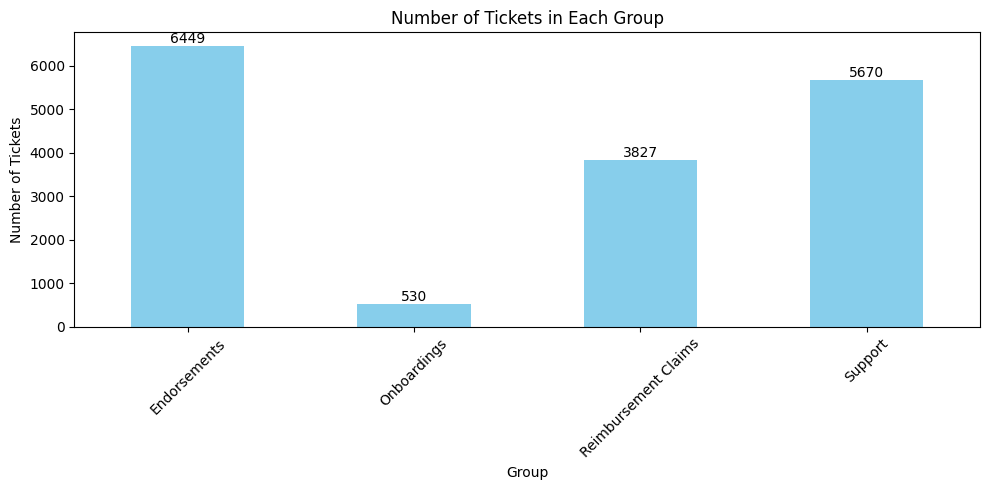

In [3]:
# Group the data by 'Group' column and count the number of tickets in each group
grouped_counts = df['Group'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
bars = grouped_counts.plot(kind='bar', color='skyblue')

# Add count values on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
             f'{int(bar.get_height())}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets in Each Group')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


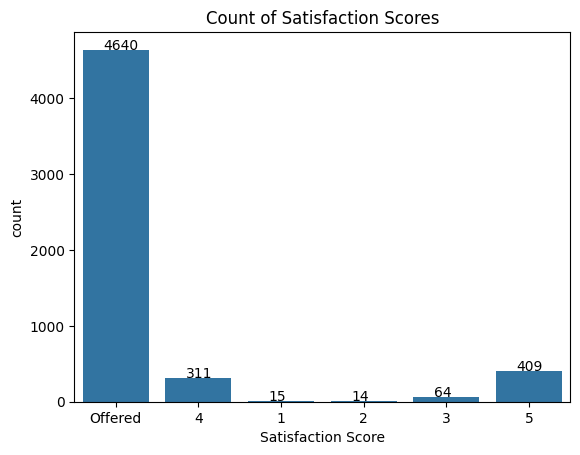

In [4]:
plt.title('Count of Satisfaction Scores')
ax = sns.countplot(data=df, x= 'Satisfaction Score');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()


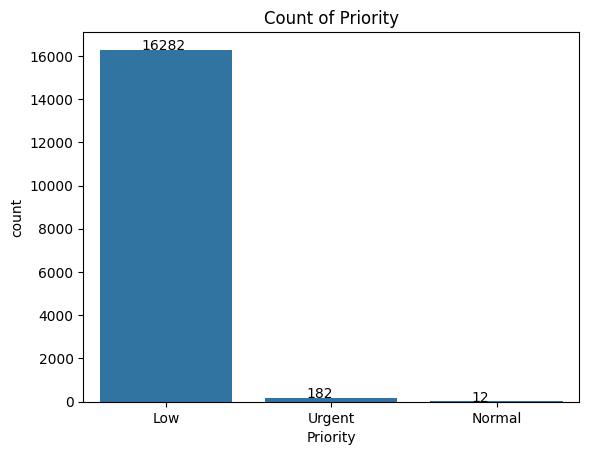

In [5]:
plt.title('Count of Priority')
ax = sns.countplot(data=df, x= 'Priority');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

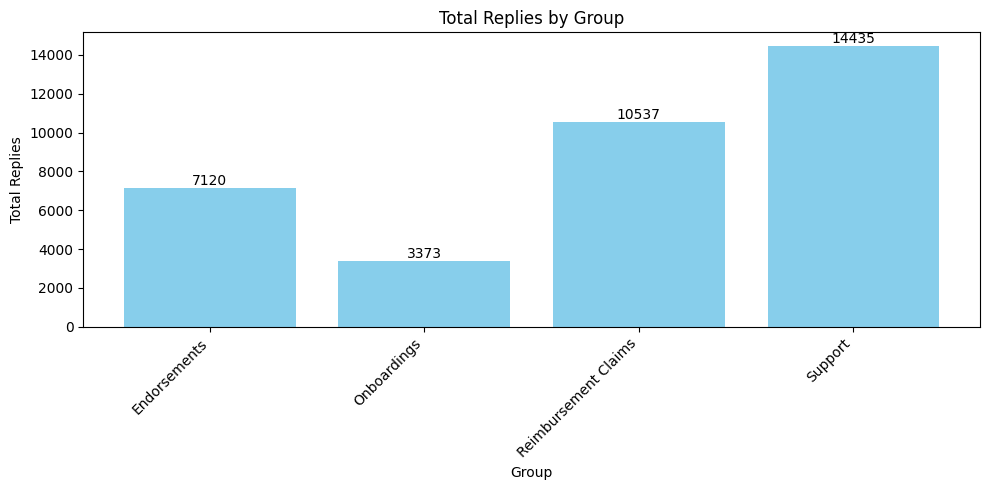

In [6]:



# Group-wise sum of replies
group_replies = df.groupby('Group')['Replies'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(group_replies['Group'], group_replies['Replies'], color='skyblue')
plt.xlabel('Group')
plt.ylabel('Total Replies')
plt.title('Total Replies by Group')
plt.xticks(rotation=45, ha='right')

# Adding count of replies on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


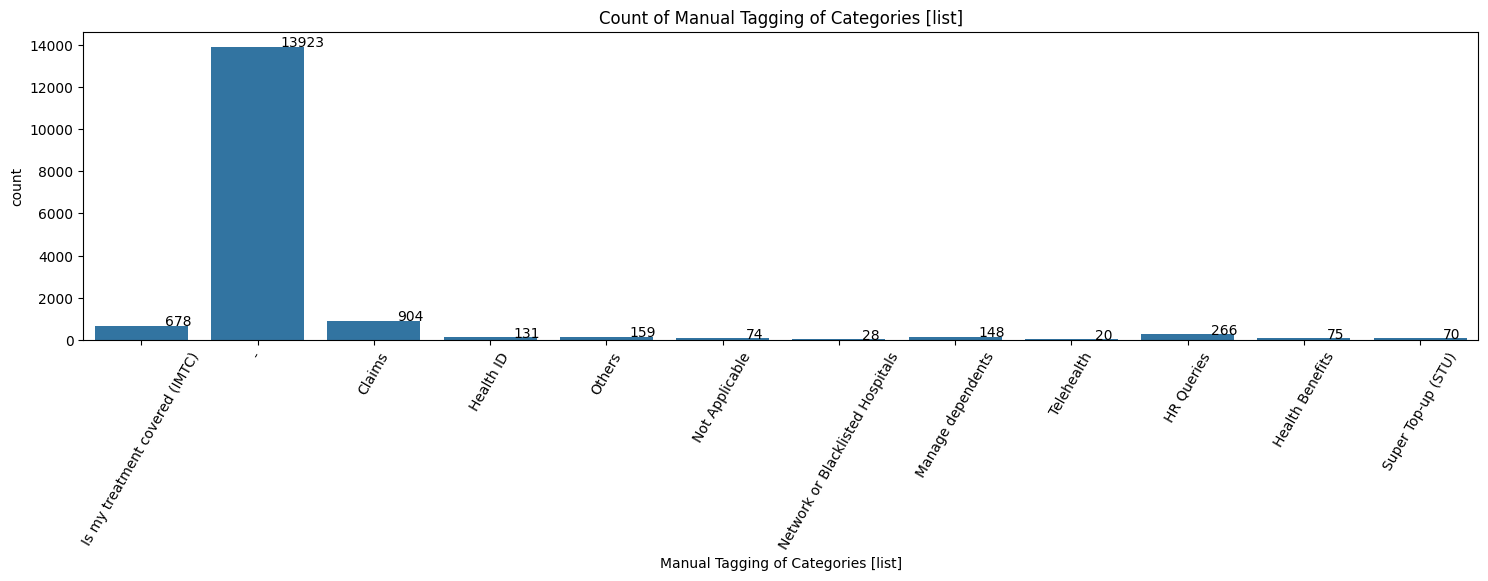

In [7]:

# Set the figure size
plt.figure(figsize=(18, 4))

# Plot the count of Manual Tagging of Categories [list]
plt.title('Count of Manual Tagging of Categories [list]')
ax = sns.countplot(data=df, x='Manual Tagging of Categories [list]')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.6, p.get_height() + 0.01))

plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()


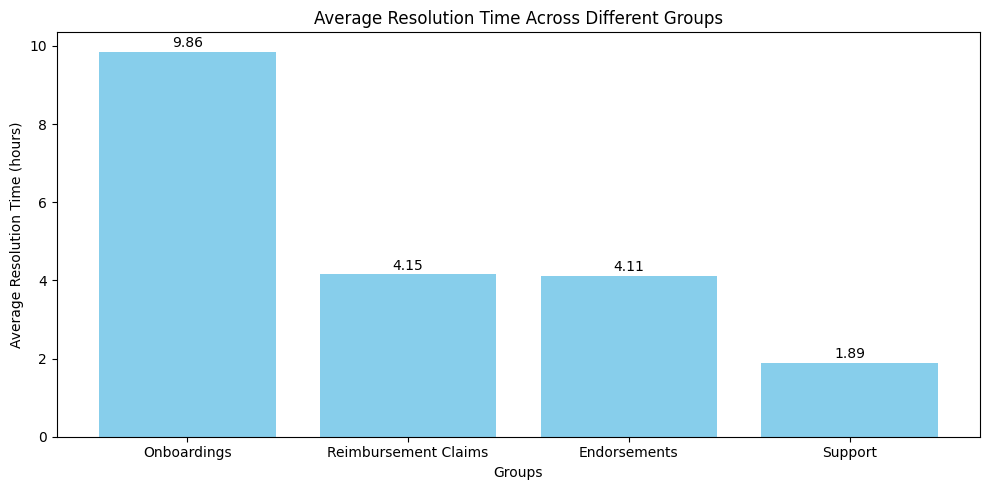

In [8]:
# Group the data by 'Group' column and calculate the average resolution time for each group
grouped_data = df.groupby('Group')['Resolution time'].mean().sort_values(ascending=False)

# Convert resolution time from minutes to hours
grouped_data_hours = grouped_data / 60  # divide by 60 to convert minutes to hours

# Create a bar plot
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped_data_hours.index, grouped_data_hours, color='skyblue')

# Add value labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Average Resolution Time (hours)')
plt.title('Average Resolution Time Across Different Groups')

# Show plot
plt.tight_layout()
plt.show()


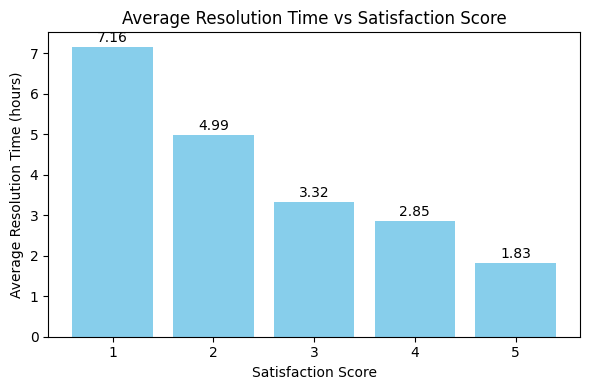

In [9]:
# Convert 'Satisfaction Score' column to numeric, handling errors by setting them to NaN
df['Satisfaction Score'] = pd.to_numeric(df['Satisfaction Score'], errors='coerce')



# Group the data by 'Satisfaction Score' column and calculate the average resolution time for each score
grouped_data = df.groupby('Satisfaction Score')['Resolution time'].mean().sort_index()

# Convert resolution time from minutes to hours
grouped_data_hours = grouped_data / 60  # divide by 60 to convert minutes to hours

# Create a bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(grouped_data_hours.index, grouped_data_hours, color='skyblue')

# Add value labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Satisfaction Score')
plt.ylabel('Average Resolution Time (hours)')
plt.title('Average Resolution Time vs Satisfaction Score')

# Show plot
plt.tight_layout()
plt.show()


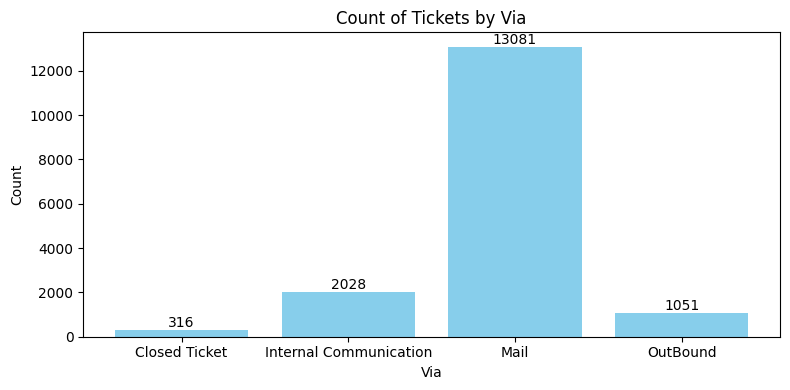

In [10]:
# Count the frequency of each value in the 'Via' column
via_counts = df['Via'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
bars = plt.bar(via_counts.index, via_counts, color='skyblue')

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, str(int(bar.get_height())), 
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Via')
plt.ylabel('Count')
plt.title('Count of Tickets by Via')

# Show plot
plt.xticks()
plt.tight_layout()
plt.show()


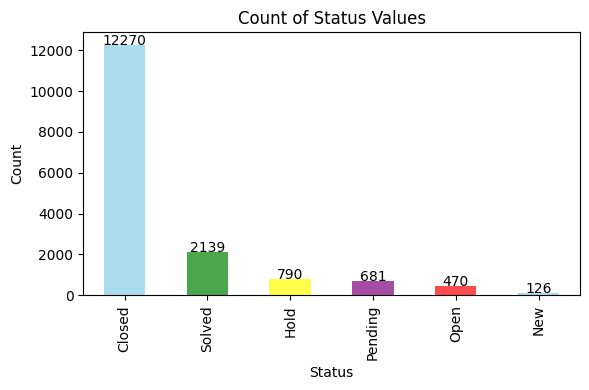

In [11]:


# Count the values in the 'Status' column
status_counts = df['Status'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
status_counts.plot(kind='bar', color=['skyblue', 'green','yellow', 'purple','red'], alpha=0.7)

# Adding labels and title
plt.title('Count of Status Values')
plt.xlabel('Status')
plt.ylabel('Count')

# Adding value labels on top of each bar
for i, count in enumerate(status_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

# Display the plot
plt.tight_layout()
plt.show()


Counts for Endorsements:
Closed: 4794
Hold: 17
New: 124
Open: 162
Pending: 527
Solved: 825



<Figure size 800x600 with 0 Axes>

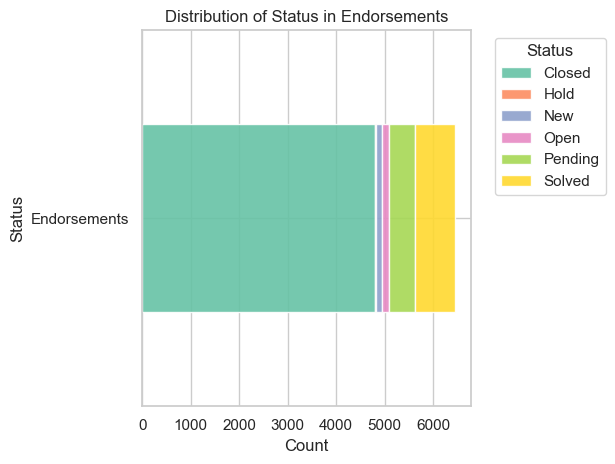

Counts for Onboardings:
Closed: 213
Hold: 0
New: 2
Open: 22
Pending: 147
Solved: 146



<Figure size 800x600 with 0 Axes>

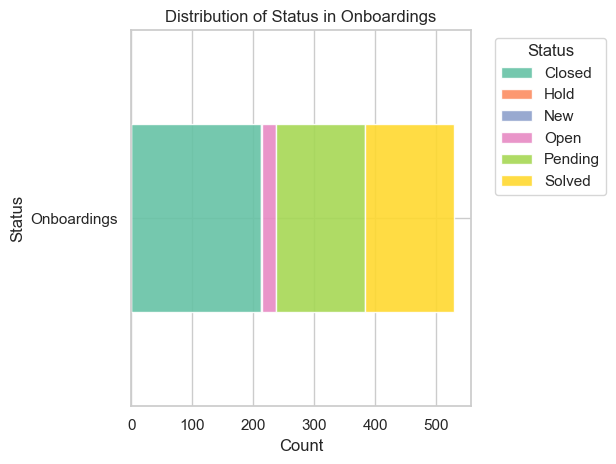

Counts for Reimbursement Claims:
Closed: 2455
Hold: 662
New: 0
Open: 186
Pending: 1
Solved: 523



<Figure size 800x600 with 0 Axes>

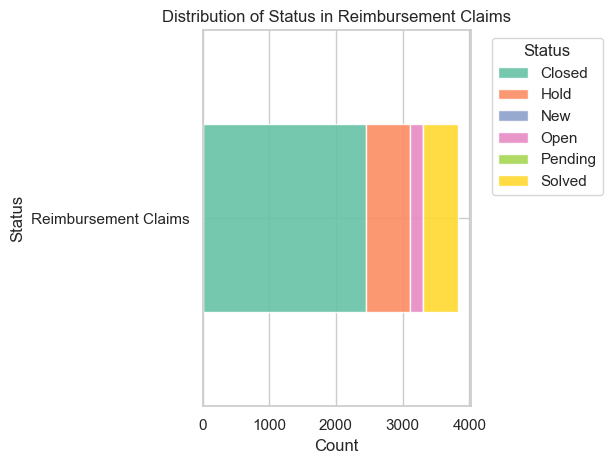

Counts for Support:
Closed: 4808
Hold: 111
New: 0
Open: 100
Pending: 6
Solved: 645



<Figure size 800x600 with 0 Axes>

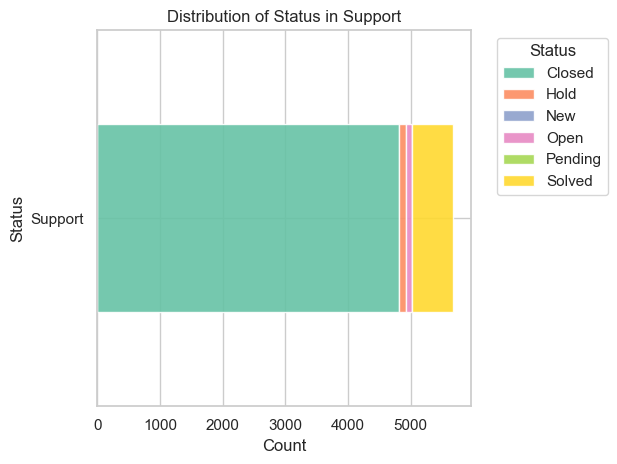

In [12]:

# Set seaborn style
sns.set(style="whitegrid")

# Grouping the data by 'Group' and 'Status' and counting occurrences
group_status_counts = df.groupby(['Group', 'Status']).size().unstack(fill_value=0)

# Print counts for each group
for group in group_status_counts.index:
    print(f"Counts for {group}:")
    for status, count in group_status_counts.loc[group].items():
        print(f"{status}: {count}")
    print()
    
    # Plot count plot for each group
    plt.figure(figsize=(8, 6))
    ax = group_status_counts.loc[[group]].plot(kind='barh', stacked=True, alpha=0.9, color=sns.color_palette("Set2", len(group_status_counts.columns)))
    
    # Adding labels and title
    plt.title(f'Distribution of Status in {group}')
    plt.xlabel('Count')
    plt.ylabel('Status')
    
    # Adding legend
    plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Display the plot
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

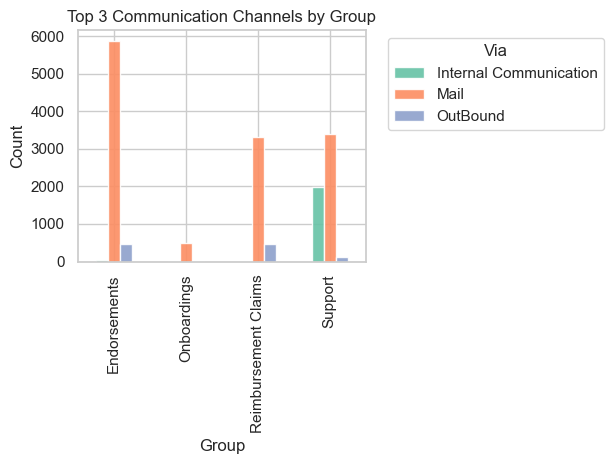

Counts for Endorsements:
Internal Communication: 36
Mail: 5865
OutBound: 464

Counts for Onboardings:
Internal Communication: 2
Mail: 505
OutBound: 6

Counts for Reimbursement Claims:
Internal Communication: 4
Mail: 3310
OutBound: 454

Counts for Support:
Internal Communication: 1986
Mail: 3401
OutBound: 127



In [13]:

sns.set(style="whitegrid")

# Determine the top N communication channels for each group
top_n = 3  # Change this value as needed
top_channels = df['Via'].value_counts().nlargest(top_n).index

# Filter the data to include only the top N communication channels
filtered_df = df[df['Via'].isin(top_channels)]

# Grouping the filtered data by 'Group' and 'Via' and counting occurrences
group_via_counts = filtered_df.groupby(['Group', 'Via']).size().unstack(fill_value=0)

# Plot grouped bar plot for each group
plt.figure(figsize=(10, 6))
group_via_counts.plot(kind='bar', stacked=False, alpha=0.9, color=sns.color_palette("Set2", len(group_via_counts.columns)))

# Adding labels and title
plt.title(f'Top {top_n} Communication Channels by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Via', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print counts for each group and communication channel
for group in group_via_counts.index:
    print(f"Counts for {group}:")
    for via, count in group_via_counts.loc[group].items():
        print(f"{via}: {count}")
    print()


In [14]:
# Calculate average response time (in minutes)
average_response_time = df['First reply time in minutes within business hours'].mean()

# Calculate average resolution time (in minutes)
average_resolution_time = df['Full resolution time in minutes within business hours'].mean()

# Calculate ticket closure rate
closed_tickets = df[df['Status'] == 'Closed']
ticket_closure_rate = (len(closed_tickets) / len(df)) * 100

# Calculate reopen rate
reopen_rate = (df['Reopens'].sum() / len(df)) * 100

# Calculate average satisfaction score
average_satisfaction_score = df[df['Status'] == 'Solved']['Satisfaction Score'].mean()

# Print the calculated efficiency metrics
print(f"Average Response Time: {average_response_time:.2f} minutes")
print(f"Average Resolution Time: {average_resolution_time:.2f} minutes")
print(f"Ticket Closure Rate: {ticket_closure_rate:.2f}%")
print(f"Reopen Rate: {reopen_rate:.2f}%")
print(f"Average Satisfaction Score: {average_satisfaction_score:.2f}")


Average Response Time: 1852.11 minutes
Average Resolution Time: 6196.64 minutes
Ticket Closure Rate: 74.47%
Reopen Rate: 24.29%
Average Satisfaction Score: 4.27


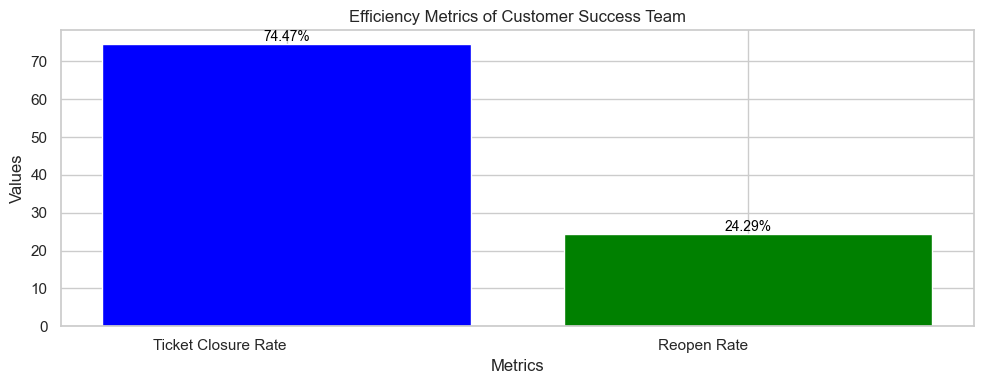

In [15]:


# Efficiency metrics
metrics = ['Ticket Closure Rate', 'Reopen Rate']

# Values for each metric (replace these with your actual values)
values = [ ticket_closure_rate, reopen_rate ]

# Plotting
plt.figure(figsize=(10, 4))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Efficiency Metrics of Customer Success Team')
plt.xticks(rotation=0, ha='right')

# Adding percentage numbers on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', 
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


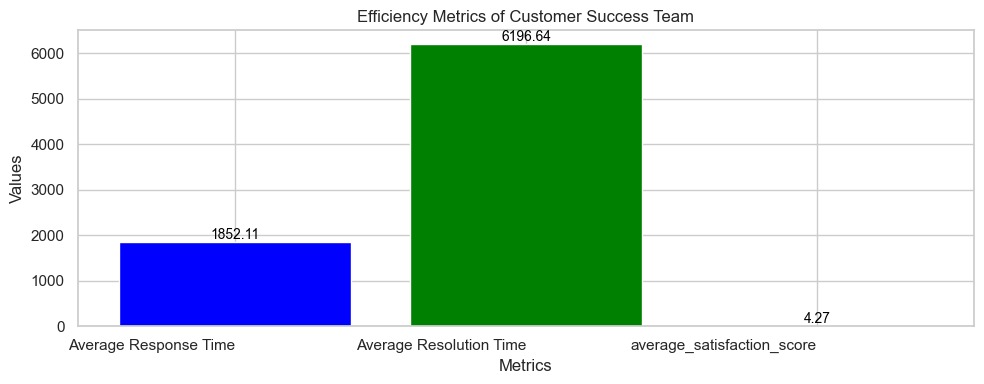

In [16]:


# Efficiency metrics
metrics = ['Average Response Time', 'Average Resolution Time','average_satisfaction_score']

# Values for each metric (replace these with your actual values)
values = [average_response_time, average_resolution_time,average_satisfaction_score]

# Plotting
plt.figure(figsize=(10, 4))
bars = plt.bar(metrics, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Efficiency Metrics of Customer Success Team')
plt.xticks(rotation=0, ha='right')

# Adding numbers on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


Average Response Time and Average Resolution Time for Each Group:
                  Group  Average Response Time (minutes)  \
0          Endorsements                      4207.170213   
1           Onboardings                      1363.774336   
2  Reimbursement Claims                      1511.346479   
3               Support                       316.797272   

   Average Resolution Time (minutes)  
0                        7171.163914  
1                       16462.730871  
2                        5128.485865  
3                        2265.417388  


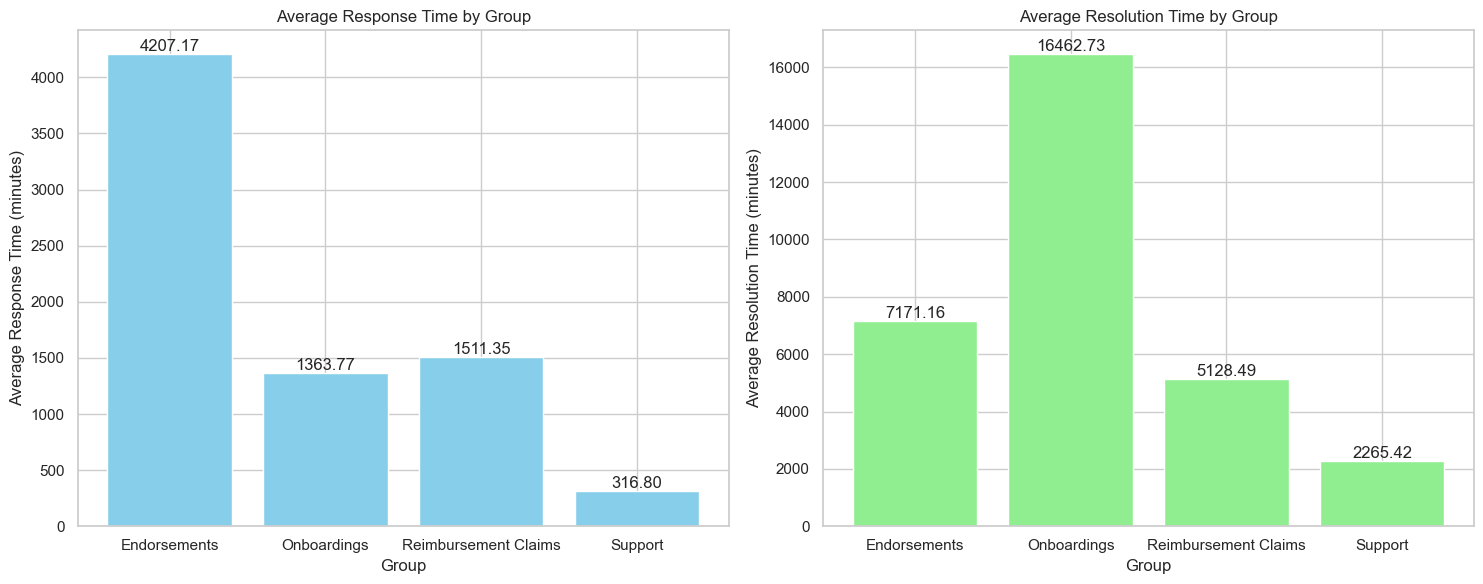

In [17]:


# Calculate average response time and average resolution time for each group
group_stats = df.groupby('Group').agg({
    'First reply time in minutes within business hours': 'mean',
    'First resolution time in minutes within business hours': 'mean'
}).reset_index()

# Rename columns for better clarity
group_stats.rename(columns={
    'First reply time in minutes within business hours': 'Average Response Time (minutes)',
    'First resolution time in minutes within business hours': 'Average Resolution Time (minutes)'
}, inplace=True)

# Display the table
print("Average Response Time and Average Resolution Time for Each Group:")
print(group_stats)

# Create bar charts for average response time and average resolution time
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
bars1 = plt.bar(group_stats['Group'], group_stats['Average Response Time (minutes)'], color='skyblue')
plt.xlabel('Group')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time by Group')

# Adding count labels on the bars for Average Response Time
for bar, value in zip(bars1, group_stats['Average Response Time (minutes)']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars2 = plt.bar(group_stats['Group'], group_stats['Average Resolution Time (minutes)'], color='lightgreen')
plt.xlabel('Group')
plt.ylabel('Average Resolution Time (minutes)')
plt.title('Average Resolution Time by Group')

# Adding count labels on the bars for Average Resolution Time
for bar, value in zip(bars2, group_stats['Average Resolution Time (minutes)']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Average Resolution Time for Each Ticket Category:
   Manual Tagging of Categories [list]  First resolution time in minutes
0                                    -                      11247.091545
2                           HR Queries                       9242.332061
4                            Health ID                       8802.976923
6                    Manage dependents                       5355.205479
8                       Not Applicable                       5254.356164
5       Is my treatment covered (IMTC)                       4889.314074
3                      Health Benefits                       4826.600000
9                               Others                       4559.823899
11                          Telehealth                       3821.600000
7     Network or Blacklisted Hospitals                       3573.785714
1                               Claims                       3470.024554
10                  Super Top-up (STU)                       3337.357143


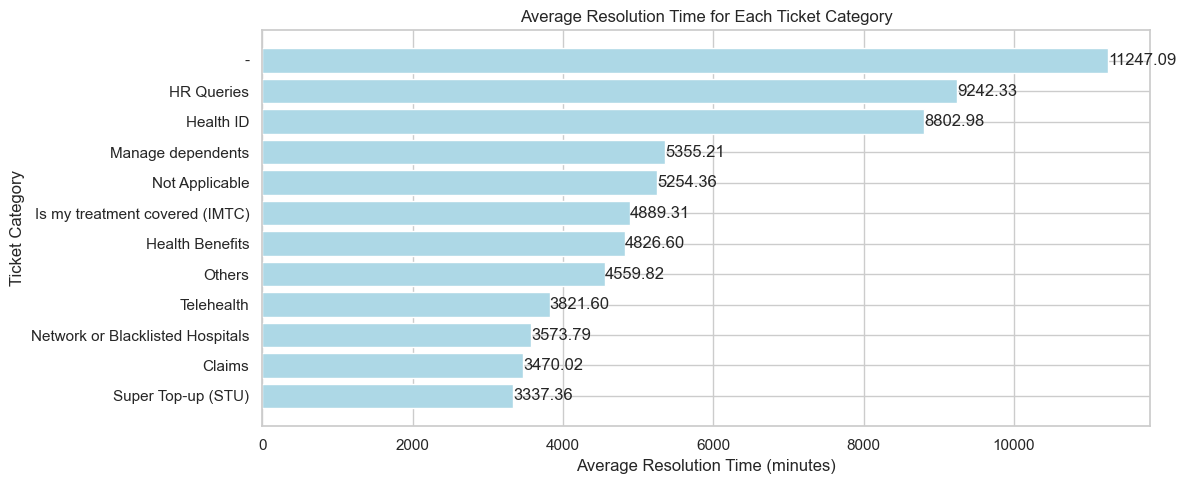

In [18]:


# Calculate average resolution time for each ticket category
category_avg_resolution_time = df.groupby('Manual Tagging of Categories [list]')['First resolution time in minutes'].mean().reset_index()

# Sort categories based on average resolution time
category_avg_resolution_time = category_avg_resolution_time.sort_values(by='First resolution time in minutes', ascending=False)

# Display the table
print("Average Resolution Time for Each Ticket Category:")
print(category_avg_resolution_time)

# Create a bar chart to visualize average resolution time for each ticket category
plt.figure(figsize=(12, 5))
bars = plt.barh(category_avg_resolution_time['Manual Tagging of Categories [list]'], category_avg_resolution_time['First resolution time in minutes'], color='lightblue')
plt.xlabel('Average Resolution Time (minutes)')
plt.ylabel('Ticket Category')
plt.title('Average Resolution Time for Each Ticket Category')
plt.gca().invert_yaxis()  # Invert y-axis to have the category with the highest resolution time at the top

# Adding count labels on the bars
for bar, value in zip(bars, category_avg_resolution_time['First resolution time in minutes']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()


<Figure size 1800x1000 with 0 Axes>

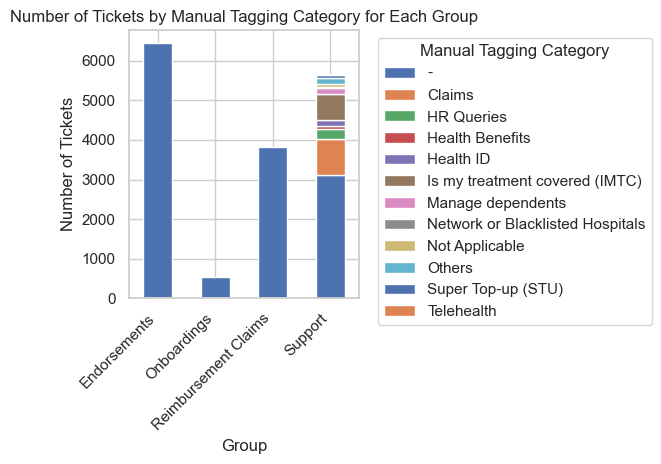

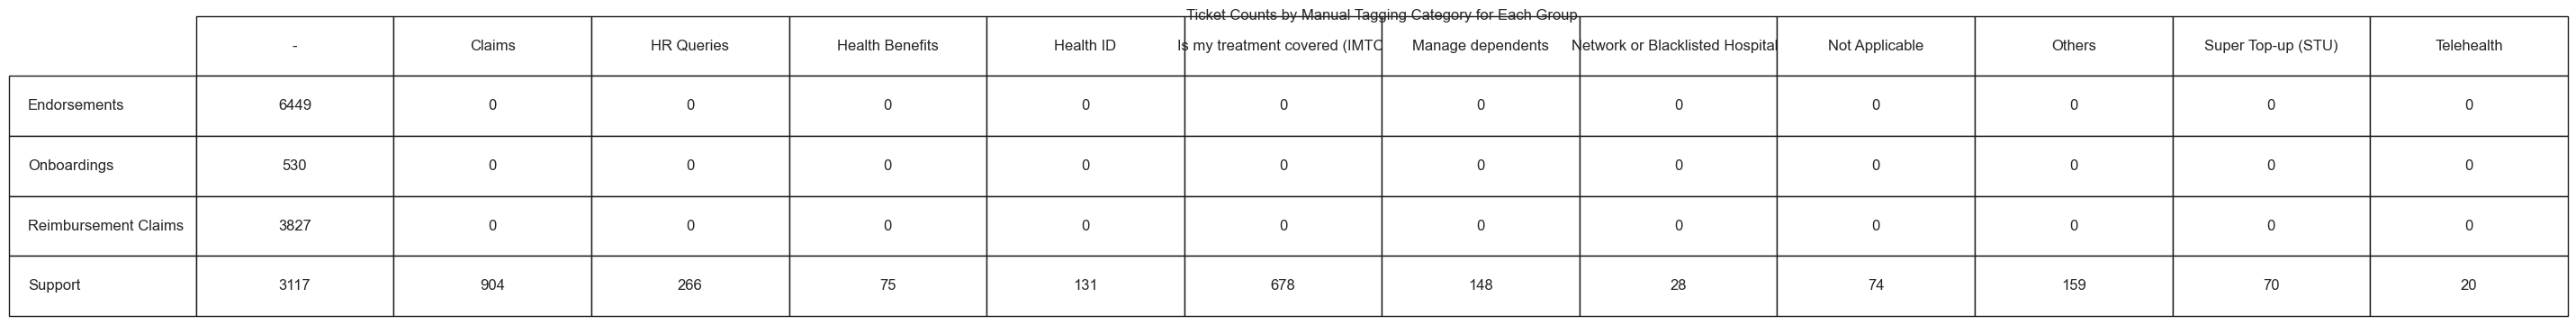

In [19]:

# Group by 'Group' and 'Manual Tagging of Categories [list]' and count the number of tickets
group_category_count = df.groupby(['Group', 'Manual Tagging of Categories [list]']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
plt.figure(figsize=(18, 10))
group_category_count.plot(kind='bar', stacked=True)
plt.xlabel('Group')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets by Manual Tagging Category for Each Group')
plt.legend(title='Manual Tagging Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Displaying the count table with increased font size
plt.figure(figsize=(10, 4))
table = plt.table(cellText=group_category_count.values,
                  rowLabels=group_category_count.index,
                  colLabels=group_category_count.columns,
                  loc='center',
                  cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)  # Adjust the font size here

# Set the cell height for the first row
cell_height = 0.20
for cell in table.properties()['children']:
    if cell.get_text().get_text() == 'Group':
        cell.set_height(cell_height)

table.scale(3.4, 4.0)  # Scale the table to increase the cell size
plt.axis('off')
plt.title('Ticket Counts by Manual Tagging Category for Each Group')
plt.show()

In [20]:
# Group by 'Manual Tagging of Categories [list]' and 'Status', and count the occurrences
category_status_counts = df.groupby(['Manual Tagging of Categories [list]', 'Status']).size().unstack(fill_value=0)

# Display the table

print(category_status_counts)


Status                               Closed  Hold  New  Open  Pending  Solved
Manual Tagging of Categories [list]                                          
-                                     10066   762  126   446      679    1844
Claims                                  785    11    0    12        0      96
HR Queries                              217     5    0     2        0      42
Health Benefits                          63     1    0     0        0      11
Health ID                               109     0    0     1        0      21
Is my treatment covered (IMTC)          596     8    0     7        0      67
Manage dependents                       123     3    0     1        1      20
Network or Blacklisted Hospitals         27     0    0     0        0       1
Not Applicable                           60     0    0     0        1      13
Others                                  146     0    0     1        0      12
Super Top-up (STU)                       59     0    0     0    

In [21]:
# Group by 'Manual Tagging of Categories [list]' and calculate the mean satisfaction score
category_satisfaction = df.groupby('Manual Tagging of Categories [list]')['Satisfaction Score'].mean().reset_index()

# Display the table

print(category_satisfaction)


   Manual Tagging of Categories [list]  Satisfaction Score
0                                    -            4.339223
1                               Claims            4.197605
2                           HR Queries            4.296296
3                      Health Benefits            4.687500
4                            Health ID            4.314286
5       Is my treatment covered (IMTC)            4.424658
6                    Manage dependents            4.463415
7     Network or Blacklisted Hospitals            4.666667
8                       Not Applicable            4.571429
9                               Others            4.325581
10                  Super Top-up (STU)            4.384615
11                          Telehealth            3.800000


In [ ]:


# Plot distribution of resolution times for each ticket category using violin plots
plt.figure(figsize=(12, 5))
sns.violinplot(x='First resolution time in minutes', y='Manual Tagging of Categories [list]', data=df, palette='muted')
plt.xlabel('Resolution Time (minutes)')
plt.ylabel('Ticket Category')
plt.title('Distribution of Resolution Times for Each Ticket Category')
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(df['Manual Tagging of Categories [list]'],df['Via'])

In [ ]:

# Group-wise sum of replies
group_replies = df.groupby('Manual Tagging of Categories [list]')['Reopens'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(group_replies['Manual Tagging of Categories [list]'], group_replies['Reopens'], color='skyblue')
plt.xlabel('Group')
plt.ylabel('Total Reopen')
plt.title('Total Reopen by each category')
plt.xticks(rotation=45, ha='right')

# Adding count of replies on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Group-wise sum of replies
group_replies = df.groupby('Manual Tagging of Categories [list]')['Replies'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(group_replies['Manual Tagging of Categories [list]'], group_replies['Replies'], color='skyblue')
plt.xlabel('Group')
plt.ylabel('Total Replies')
plt.title('Total replies by each category')
plt.xticks(rotation=45, ha='right')

# Adding count of replies on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:

# Group by 'Manual Tagging of Categories [list]' and 'Status', and count the occurrences
category_status_counts = df.groupby(['Manual Tagging of Categories [list]', 'Status']).size().unstack(fill_value=0)

# Display the table

print(category_status_counts)


In [ ]:



# Group by 'Manual Tagging of Categories [list]' and calculate the mean satisfaction score
category_satisfaction = df.groupby('Manual Tagging of Categories [list]')['Satisfaction Score'].mean().reset_index()

# Display the table

print(category_satisfaction)


In [ ]:


# Calculate average requester wait time for each group
group_avg_wait_time = df.groupby('Group')['Requester wait time in minutes'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(data=group_avg_wait_time, x='Group', y='Requester wait time in minutes', palette='Set2')
plt.xlabel('Group')
plt.ylabel('Average Requester Wait Time (minutes)')
plt.title('Average Requester Wait Time by Group')
plt.xticks(rotation=0, ha='right')

# Adding average wait time values on top of each bar
for index, row in group_avg_wait_time.iterrows():
    bar_plot.text(row.name, row['Requester wait time in minutes'] + 0.5, f'{row["Requester wait time in minutes"]:.2f}', 
                  color='black', ha="center")

plt.tight_layout()
plt.show()


In [ ]:

# Calculate average requester wait time for each group
group_avg_wait_time = df.groupby('Manual Tagging of Categories [list]')['Requester wait time in minutes'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(data=group_avg_wait_time, x='Manual Tagging of Categories [list]', y='Requester wait time in minutes', palette='Set2')
plt.xlabel('Manual Tagging of Categories [list]')
plt.ylabel('Average Requester Wait Time (minutes)')
plt.title('Average Requester Wait Time by Categories')
plt.xticks(rotation=45, ha='right')

# Adding average wait time values on top of each bar
for index, row in group_avg_wait_time.iterrows():
    bar_plot.text(row.name, row['Requester wait time in minutes'] + 0.5, f'{row["Requester wait time in minutes"]:.2f}', 
                  color='black', ha="center")

plt.tight_layout()
plt.show()


In [ ]:

# Group the data by 'Group' column and calculate the average resolution time for each group
grouped_data = df.groupby('Group')['Resolution time'].mean().sort_values(ascending=False)

# Convert resolution time from minutes to hours
grouped_data_hours = grouped_data / 60  # divide by 60 to convert minutes to hours

# Convert the grouped data into a DataFrame
grouped_data_df = grouped_data_hours.reset_index()

# Create a point plot
plt.figure(figsize=(10, 4))
sns.pointplot(data=grouped_data_df, x='Group', y='Resolution time', color='skyblue')

# Add value labels to each point
for index, row in grouped_data_df.iterrows():
    plt.text(row.name, row['Resolution time'], round(row['Resolution time'], 2), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Average Resolution Time (hours)')
plt.title('Average Resolution Time Across Different Groups')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:

# Convert columns to numeric if they are not already
df['Requester wait time in minutes'] = pd.to_numeric(df['Requester wait time in minutes'], errors='coerce')
df['Satisfaction Score'] = pd.to_numeric(df['Satisfaction Score'], errors='coerce')

# Drop NaN values if any
df.dropna(subset=['Requester wait time in minutes', 'Satisfaction Score'], inplace=True)

# Plotting
plt.figure(figsize=(10, 4))
plt.scatter(df['Requester wait time in minutes'], df['Satisfaction Score'], color='blue', alpha=0.5)
plt.xlabel('Requester Wait Time (minutes)')
plt.ylabel('Satisfaction Score')
plt.title('Satisfaction Score vs Requester Wait Time')
plt.grid(True)
plt.tight_layout()
plt.show()
